Solve the 1D Laplace's equation with a Neumann condition,
$$
 \begin{eqnarray}
  && u'' = f , \quad x \in (a,b),\\
  && u'(a)= \alpha, \quad u(b)= \beta,
 \end{eqnarray}
$$
using 1st and 2nd order approximations of the Neumann boundary condition.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 0; b = 1;
alpha = 1; beta = 2;

n = 10 # initial number of points
h = (b-a)/(n+1)

# RHS
def f(x):
    return np.exp(x)

# Exact solution
def u_true(x, alpha, beta):
    return np.exp(x) + (alpha - np.exp(a))*(x-b) + beta - np.exp(b)

Convergence loop, over increasing number of mesh points, decreasing $h$ to $h/2$ at each iteration 

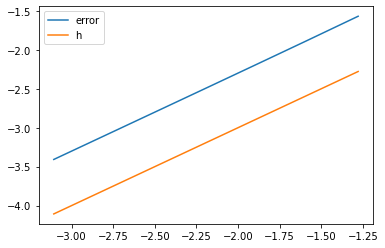

In [2]:
iter = 8
err = np.zeros([iter,2])
for k in range(0,iter):
    # Mesh
    x = np.linspace(a,b,n)
    # Assemble sparse FD matrix A and right-hand side
    diago = np.zeros(n)
    lower = np.zeros(n-1)
    upper = np.zeros(n-1)
    U     = np.zeros(n)
    # Precompute sparse matrix (scipy format)
    diago[:] = -2.
    lower[:] =  1.
    upper[:] =  1.
    # Insert boundary conditions (1st order)
    diago[0]  = -1.
    upper[0]  =  1.
    lower[-1] =  0.
    diago[-1] =  1.
    # Insert boundary conditions (2nd order)
    #diago[0]  = -3.
    #upper[0]  =  4.

    diags = [0, -1, 1]
    import scipy.sparse
    import scipy.sparse.linalg
    A = scipy.sparse.diags(
        diagonals=[diago, lower, upper],
        offsets=diags, shape=(n, n),
        format='csr')
    #A[0,2] = -1.  # 2nd order
    F = h**2 * f(x)
    F[0] = h*alpha    # 1st order
    #F[0] = 2*h*alpha # 2nd order
    F[n-1] = beta
    # solve
    U[:] = scipy.sparse.linalg.spsolve(A, F)
    # compute error
    err[k,1] = np.max(np.abs(U-u_true(x,alpha,beta)))
    err[k,0] = h
    n = n*2
    h = (b-a)/(n-1)
# plot errors
plt.plot(np.log10(err[1:,0]),np.log10(err[1:,1]),'-',label="error")
plt.plot(np.log10(err[1:,0]),np.log10(err[1:,0])-1 ,'-',label="h")
#plt.plot(np.log10(err[1:,0]),2*np.log10(err[1:,0])-1 ,'-',label="h^2") # 2nd order
plt.legend()